In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from tqdm.auto import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import train_test_split

#### Download dataset

In [2]:
# download from google drive
!gdown --id '' --output pneumonia.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fIViA1w8MVJJZJcAjMwapHIYazuyTczE
To: /content/pneumonia.zip
100% 118M/118M [00:01<00:00, 72.1MB/s]


In [3]:
# unzip dataset file
!unzip -q pneumonia.zip

#### Prepare dataset

In [5]:
IMG_SIZE = 200
all_class = ['normal', 'bacteria', 'virus']
class_map = {cls:i for i,cls in enumerate(all_class)} #  'normal':0, 'bacteria': 1, 'virus':2
class_map

{'bacteria': 1, 'normal': 0, 'virus': 2}

In [6]:
# read all paths
img_paths_train = glob('pneumonia/train/*/*.jpeg')
img_paths_test = glob('pneumonia/val/*/*.jpeg')

In [7]:
img_paths_train

['pneumonia/train/pneumonia/person942_bacteria_2867.jpeg',
 'pneumonia/train/pneumonia/person516_bacteria_2192.jpeg',
 'pneumonia/train/pneumonia/person1644_bacteria_4361.jpeg',
 'pneumonia/train/pneumonia/person803_bacteria_2710.jpeg',
 'pneumonia/train/pneumonia/person516_bacteria_2191.jpeg',
 'pneumonia/train/pneumonia/person414_virus_845.jpeg',
 'pneumonia/train/pneumonia/person354_bacteria_1635.jpeg',
 'pneumonia/train/pneumonia/person1668_bacteria_4420.jpeg',
 'pneumonia/train/pneumonia/person1725_bacteria_4551.jpeg',
 'pneumonia/train/pneumonia/person923_bacteria_2848.jpeg',
 'pneumonia/train/pneumonia/person281_virus_578.jpeg',
 'pneumonia/train/pneumonia/person1131_bacteria_3073.jpeg',
 'pneumonia/train/pneumonia/person675_bacteria_2569.jpeg',
 'pneumonia/train/pneumonia/person1723_bacteria_4548.jpeg',
 'pneumonia/train/pneumonia/person342_virus_701.jpeg',
 'pneumonia/train/pneumonia/person719_virus_1338.jpeg',
 'pneumonia/train/pneumonia/person466_bacteria_1984.jpeg',
 'pneum

In [ ]:
# number of images
len(img_paths_train), len(img_paths_test)

(150, 100)

pneumonia/train/pneumonia/person942_bacteria_2867.jpeg
(304, 679, 3)


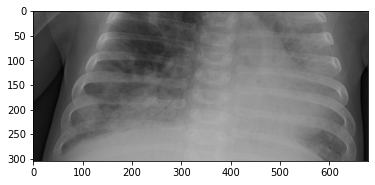

In [12]:
# show image
path = img_paths_train[0]
img = cv2.imread(path)
print(path)
print(img.shape)
plt.imshow(img)

((304, 679, 3), (200, 200, 3))

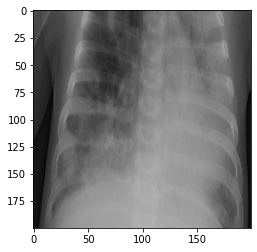

In [13]:
# Resize img
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_resized)
img.shape, img_resized.shape

pneumonia/train/pneumonia/person414_virus_845.jpeg
(260, 577, 3)


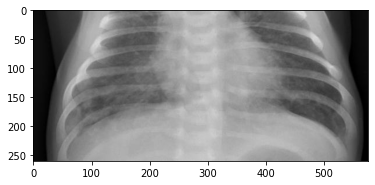

In [14]:
# show image
path = img_paths_train[5]
img = cv2.imread(path)
print(path)
print(img.shape)
plt.imshow(img)

((260, 577, 3), (200, 200, 3))

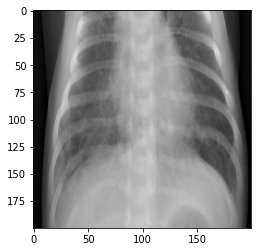

In [15]:
# Resize img
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_resized)
img.shape, img_resized.shape

pneumonia/train/normal/IM-0730-0001.jpeg
(951, 1310, 3)


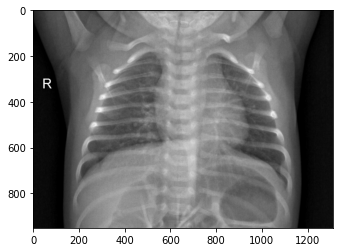

In [16]:
# show image
path = img_paths_train[-1]
img = cv2.imread(path)
print(path)
print(img.shape)
plt.imshow(img)

((951, 1310, 3), (200, 200, 3))

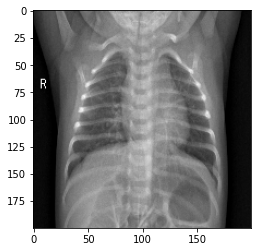

In [17]:
# Resize img
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_resized)
img.shape, img_resized.shape

In [ ]:
# Extract img class
cls = path.split(os.sep)[-2]
print(cls)

normal


In [ ]:
# Get file class index

# for pneumonia class
if cls == 'pneumonia':
    # get filename
    filename = path.split(os.sep)[-1]
    print(filename)
    # get pneumonia class
    cls_pneumonia = filename.split('_')[1] 
    print(cls_pneumonia)
    cls_idx = class_map[cls_pneumonia]
    print(cls_idx)
# for normal class
else:
    cls_idx = class_map[cls]

### Read all images

In [ ]:
def read_data(paths):
    data_count = len(paths)
    x = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
    y = np.zeros((data_count, ))

    for i, path in tqdm(enumerate(paths)):
        # read image
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # resize
        img = img / 255. # normalization

        # read class index
        cls = path.split(os.sep)[-2]
        # for pneumonia class
        if cls == 'pneumonia':
            # get filename
            filename = path.split(os.sep)[-1]
            # get pneumonia class
            cls_pneumonia = filename.split('_')[1] 
            cls_idx = class_map[cls_pneumonia]
        # for normal class
        else:
            cls_idx = class_map[cls]
        x[i] = img
        y[i] = cls_idx
    return x, y

In [ ]:
x_train, y_train = read_data(img_paths_train)
x_test, y_test = read_data(img_paths_test)

In [ ]:
# label count
print(all_class)
# train
unique_classes, counts = np.unique(y_train, return_counts=True)
print(unique_classes, counts)

# val
unique_classes, counts = np.unique(y_test, return_counts=True)
print(unique_classes, counts)

['normal', 'bacteria', 'virus']
[0. 1. 2.] [100  33  17]
[0. 1. 2.] [50 28 22]


In [ ]:
# split train and test dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5566)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((120, 200, 200, 3), (30, 200, 200, 3), (120,), (30,))

In [ ]:
y_train

array([1., 1., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 1., 1., 2., 1., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0.,
       2., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 2., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 2.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 2., 0., 0., 2., 2., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 2., 2., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 2.,
       0.])

In [ ]:
# ont-hot encoding
y_train = utils.to_categorical(y_train, num_classes=len(class_map))
y_val = utils.to_categorical(y_val, num_classes=len(class_map))
y_test = utils.to_categorical(y_test, num_classes=len(class_map))

### Build model

In [ ]:
# 1
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
prediction = layers.Dense(3, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=prediction)

In [ ]:
# 1
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model2.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(2))
model2.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model2.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(2))
model2.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model2.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model2.add(layers.MaxPool2D(2))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 128)       0     

### Training

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
logs = model.fit(x_train, y_train,
                batch_size=32,
                epochs=50,
                verbose=1,
                validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 46s 3s/step - loss: 1.0840 - accuracy: 0.4258 - val_loss: 1.0303 - val_accuracy: 0.6667
Epoch 2/50
4/4 [==============================] - 1s 199ms/step - loss: 1.0099 - accuracy: 0.6708 - val_loss: 0.9228 - val_accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 1s 197ms/step - loss: 0.9219 - accuracy: 0.6417 - val_loss: 0.8445 - val_accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 1s 199ms/step - loss: 0.8451 - accuracy: 0.6708 - val_loss: 0.8262 - val_accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 1s 199ms/step - loss: 0.8623 - accuracy: 0.6615 - val_loss: 0.8163 - val_accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 1s 201ms/step - loss: 0.9119 - accuracy: 0.6177 - val_loss: 0.8252 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 1s 200ms/step - loss: 0.7857 - accuracy: 0.7125 - val_loss: 0.8588 - val_accuracy: 0.6667
Epoch 8/50
4/4 [======

### Training logs

In [ ]:

history = logs.history

In [ ]:
min_loss_epoch = np.argmin(history['val_loss'])
print('val loss ', history['val_loss'][min_loss_epoch])
print('val acc', history['val_accuracy'][min_loss_epoch])

val loss  0.24279667437076569
val acc 0.9333333373069763


Text(0.5, 1.0, 'accuracy')

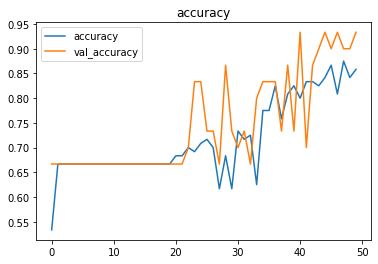

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

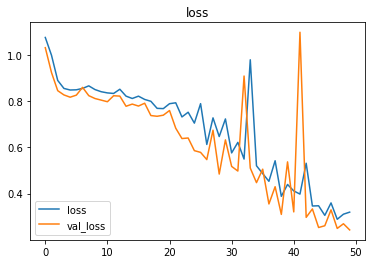

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

### Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.argmax(y_test, axis=-1)
prediction = model.predict(x_test)
y_pred = np.argmax(prediction, axis=-1)

print(y_true.shape, y_pred.shape)

(100,) (100,)


In [ ]:
# classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.49      0.79      0.60        28
           2       0.38      0.14      0.20        22

    accuracy                           0.68       100
   macro avg       0.59      0.59      0.56       100
weighted avg       0.68      0.68      0.66       100



In [ ]:
# Confusion matrix:
#   row: Ground truth
#   column: predict
print(confusion_matrix(y_true, y_pred))

[[43  5  2]
 [ 3 22  3]
 [ 1 18  3]]


#### Save model

In [ ]:
# 1. save whole model and weights
model.save('my_model.h5')
model2 = models.load_model('my_model.h5')
# mode1 = model2

In [ ]:
# 2. save and load weights only
model.save_weights('my_model_weights.h5')

# Rebuild model before load weights !
model2 = build_model()
model2.load_weights('my_model_weights.h5')

# model = model2